In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_excel('/content/Airlines.xlsx')

In [3]:
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [4]:
data.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [5]:
data = data.set_index(data['Month'])

In [6]:
data.drop('Month' , axis =1 , inplace = True)

In [7]:
data

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [8]:
data.shape

(96, 1)

In [9]:
data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


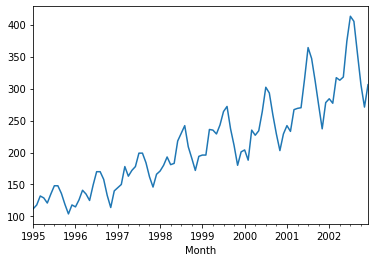

In [11]:
data['Passengers'].plot()

**we can see that it is a seasonal data**

In [12]:
data.isnull().sum()

Passengers    0
dtype: int64

**there are no missing values**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


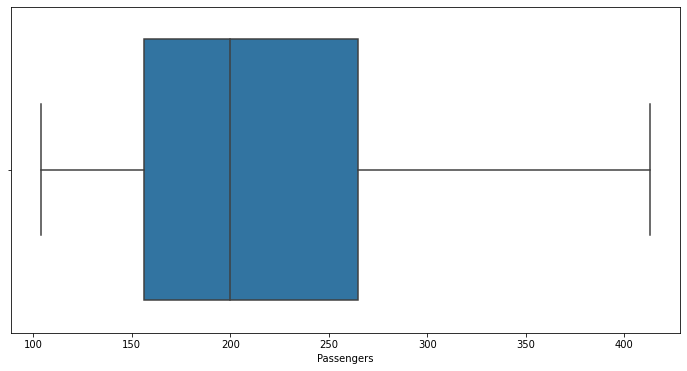

In [13]:
plt.figure(figsize=(12,6))
sns.boxplot(data['Passengers'])
plt.show()

**there are no outliers and it is right skewed data**

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

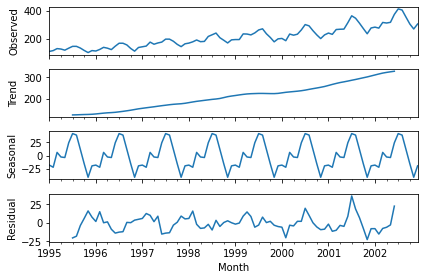

In [15]:
decompose_ts_add = seasonal_decompose(data['Passengers'],freq= 12)
decompose_ts_add.plot()
plt.show()

In [16]:
len(data)

96

In [17]:
(20/100)*96

19.200000000000003

In [18]:
96-19

77

In [19]:
train = data.head(77)

In [20]:
train

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2001-01-01,242
2001-02-01,233
2001-03-01,267


In [21]:
test = data.tail(19)

In [22]:
test

,Passengers
Month,
2001-06-01,315
2001-07-01,364
2001-08-01,347
2001-09-01,312
2001-10-01,274
2001-11-01,237
2001-12-01,278
2002-01-01,284
2002-02-01,277


**The data has a trend as well as a seasonal component**

In [23]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [24]:
from sklearn.metrics import mean_squared_error

# **Simple Moving Average**

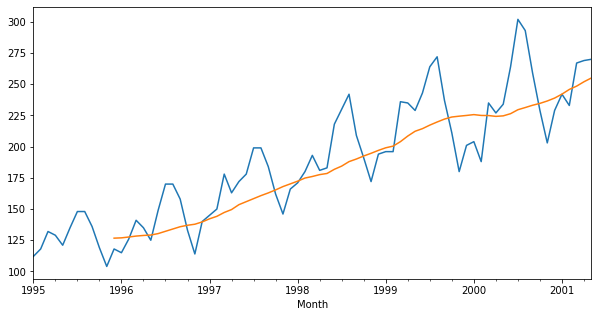

In [25]:
train['Passengers'].plot()
train['Passengers'].rolling(12).mean().plot(figsize = (10,5
                                                       ))

In [26]:
forecast = test.copy()

In [27]:
forecast['sma_forecast'] = test['Passengers'].rolling(8).mean()

In [28]:
forecast

,Passengers,sma_forecast
Month,,
2001-06-01,315,NaN
2001-07-01,364,NaN
2001-08-01,347,NaN
2001-09-01,312,NaN
2001-10-01,274,NaN
2001-11-01,237,NaN
2001-12-01,278,NaN
2002-01-01,284,301.375
2002-02-01,277,296.625


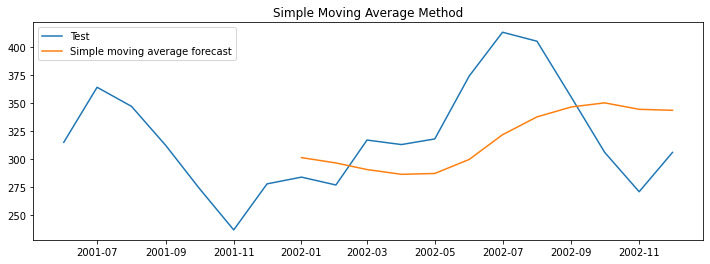

In [29]:
plt.figure(figsize=(12,4))
plt.plot(test['Passengers'], label='Test')
plt.plot(forecast['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [30]:
forecast = forecast.fillna(0)

In [31]:
forecast

,Passengers,sma_forecast
Month,,
2001-06-01,315,0.000
2001-07-01,364,0.000
2001-08-01,347,0.000
2001-09-01,312,0.000
2001-10-01,274,0.000
2001-11-01,237,0.000
2001-12-01,278,0.000
2002-01-01,284,301.375
2002-02-01,277,296.625


In [32]:
mse = mean_squared_error(forecast['sma_forecast'],test.Passengers)
RMSE = np.sqrt(mse)
RMSE

190.32041239709417

# **Cumulative moving average**

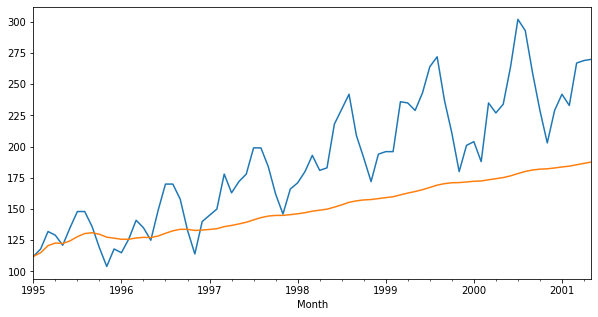

In [33]:
train['Passengers'].plot()
train['Passengers'].expanding().mean().plot(figsize = (10,5
                                                       ))

In [34]:
forecast['cma_forecast'] = test['Passengers'].expanding().mean()

In [35]:
forecast

,Passengers,sma_forecast,cma_forecast
Month,,,
2001-06-01,315,0.000,315.000000
2001-07-01,364,0.000,339.500000
2001-08-01,347,0.000,342.000000
2001-09-01,312,0.000,334.500000
2001-10-01,274,0.000,322.400000
2001-11-01,237,0.000,308.166667
2001-12-01,278,0.000,303.857143
2002-01-01,284,301.375,301.375000
2002-02-01,277,296.625,298.666667


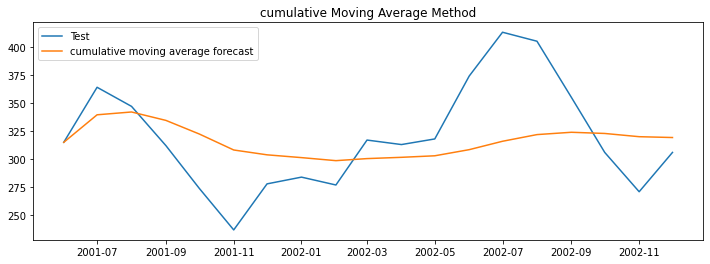

In [36]:
plt.figure(figsize=(12,4))
plt.plot(test['Passengers'], label='Test')
plt.plot(forecast['cma_forecast'], label='cumulative moving average forecast')
plt.legend(loc='best')
plt.title('cumulative Moving Average Method')
plt.show()

In [37]:
mse = mean_squared_error(forecast['cma_forecast'],test.Passengers)
RMSE = np.sqrt(mse)
RMSE

42.95724372668785

In [38]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

# **Simple Exponential method**

In [39]:
import warnings
warnings.filterwarnings("ignore")
ses_model = SimpleExpSmoothing(train['Passengers']).fit(smoothing_level=0.2)

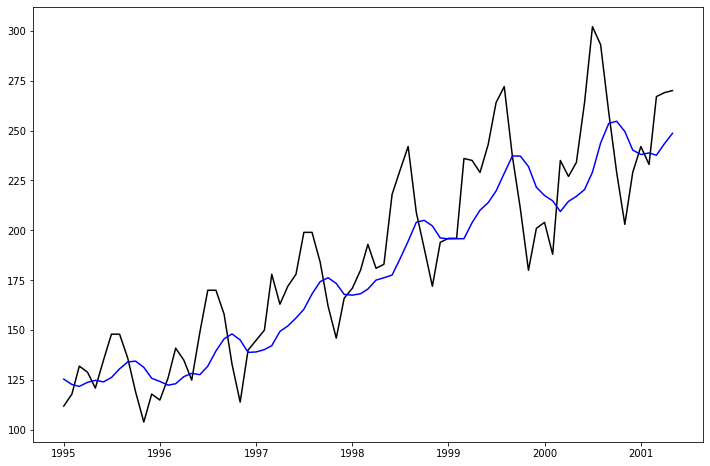

In [40]:
plt.figure(figsize=(12, 8))
plt.plot(train['Passengers'] , color="black")
plt.plot(ses_model.fittedvalues, color="blue")

In [41]:
forecast['ses_forecast'] = ses_model.forecast(len(test))

In [42]:
forecast

,Passengers,sma_forecast,cma_forecast,ses_forecast
Month,,,,
2001-06-01,315,0.000,315.000000,252.879249
2001-07-01,364,0.000,339.500000,252.879249
2001-08-01,347,0.000,342.000000,252.879249
2001-09-01,312,0.000,334.500000,252.879249
2001-10-01,274,0.000,322.400000,252.879249
2001-11-01,237,0.000,308.166667,252.879249
2001-12-01,278,0.000,303.857143,252.879249
2002-01-01,284,301.375,301.375000,252.879249
2002-02-01,277,296.625,298.666667,252.879249


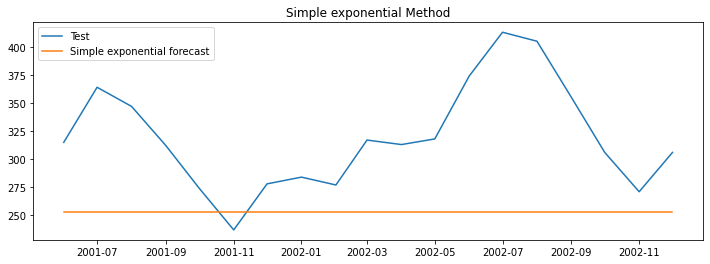

In [43]:
plt.figure(figsize=(12,4))
plt.plot(test['Passengers'], label='Test')
plt.plot(forecast['ses_forecast'], label='Simple exponential forecast')
plt.legend(loc='best')
plt.title('Simple exponential Method')
plt.show()

In [44]:
MAPE(forecast['ses_forecast'],test.Passengers) 

19.907063237282166

In [45]:
mse = mean_squared_error(forecast['ses_forecast'],test.Passengers)
RMSE = np.sqrt(mse)
RMSE

80.54332901443956

# **Exponential Weighted Moving Average**

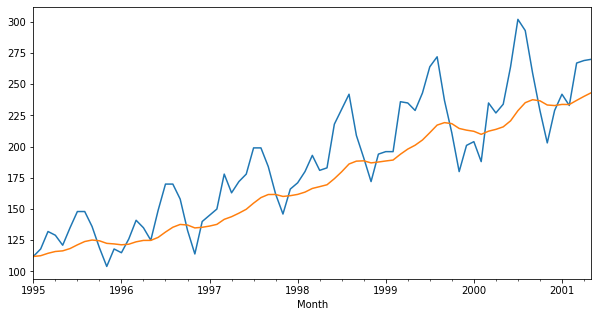

In [46]:
plt.figure(figsize = (10,5))
train['Passengers'].plot()
train['Passengers'].ewm(alpha=0.1, adjust=False).mean().plot()

In [47]:
forecast['ewm_forecast'] = test['Passengers'].ewm(alpha=0.1, adjust=False).mean()

In [48]:
forecast

,Passengers,sma_forecast,cma_forecast,ses_forecast,ewm_forecast
Month,,,,,
2001-06-01,315,0.000,315.000000,252.879249,315.000000
2001-07-01,364,0.000,339.500000,252.879249,319.900000
2001-08-01,347,0.000,342.000000,252.879249,322.610000
2001-09-01,312,0.000,334.500000,252.879249,321.549000
2001-10-01,274,0.000,322.400000,252.879249,316.794100
2001-11-01,237,0.000,308.166667,252.879249,308.814690
2001-12-01,278,0.000,303.857143,252.879249,305.733221
2002-01-01,284,301.375,301.375000,252.879249,303.559899
2002-02-01,277,296.625,298.666667,252.879249,300.903909


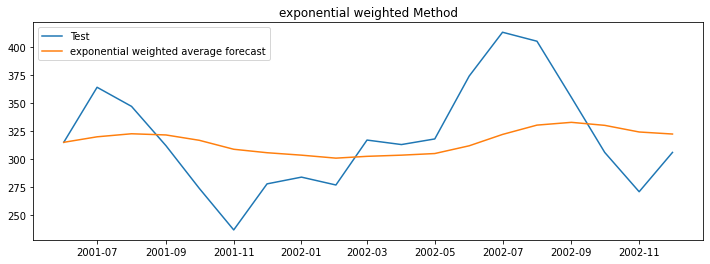

In [49]:
plt.figure(figsize=(12,4))
plt.plot(test['Passengers'], label='Test')
plt.plot(forecast['ewm_forecast'], label='exponential weighted average forecast')
plt.legend(loc='best')
plt.title('exponential weighted Method')
plt.show()

In [50]:
MAPE(forecast['ewm_forecast'],test.Passengers) 

10.60412225174807

In [51]:
mse = mean_squared_error(forecast['ewm_forecast'],test.Passengers)
RMSE = np.sqrt(mse)
RMSE

42.11192704440786

# **Holts linear method**

In [52]:
import warnings
warnings.filterwarnings("ignore")
hm_model = Holt(train['Passengers']).fit(smoothing_level=0.1, smoothing_slope=0.2)

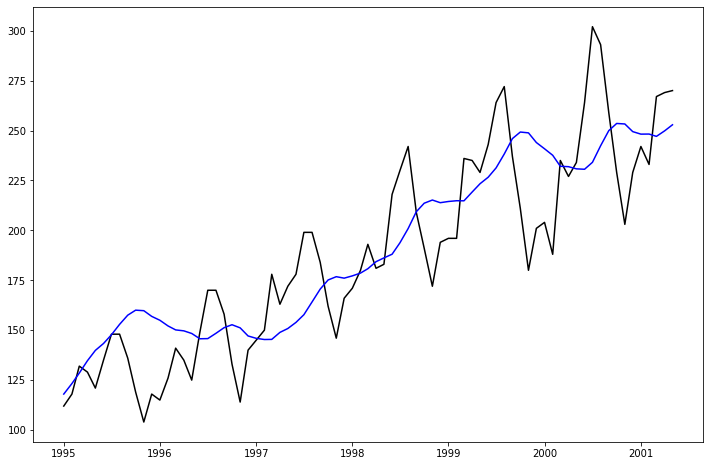

In [53]:
plt.figure(figsize=(12, 8))
plt.plot(train['Passengers'],  color="black")
plt.plot(hm_model.fittedvalues,  color="blue")

In [54]:
forecast['hm_forecast'] = hm_model.forecast(len(test))

In [55]:
forecast

,Passengers,sma_forecast,cma_forecast,ses_forecast,ewm_forecast,hm_forecast
Month,,,,,,
2001-06-01,315,0.000,315.000000,252.879249,315.000000,256.067943
2001-07-01,364,0.000,339.500000,252.879249,319.900000,257.550221
2001-08-01,347,0.000,342.000000,252.879249,322.610000,259.032499
2001-09-01,312,0.000,334.500000,252.879249,321.549000,260.514777
2001-10-01,274,0.000,322.400000,252.879249,316.794100,261.997055
2001-11-01,237,0.000,308.166667,252.879249,308.814690,263.479333
2001-12-01,278,0.000,303.857143,252.879249,305.733221,264.961611
2002-01-01,284,301.375,301.375000,252.879249,303.559899,266.443889
2002-02-01,277,296.625,298.666667,252.879249,300.903909,267.926167


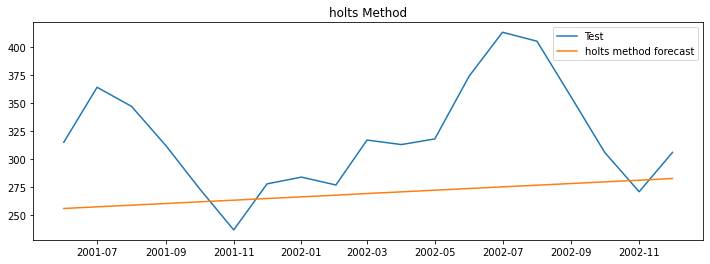

In [56]:
plt.figure(figsize=(12,4))
plt.plot(test['Passengers'], label='Test')
plt.plot(forecast['hm_forecast'], label='holts method forecast')
plt.legend(loc='best')
plt.title('holts Method')
plt.show()

In [57]:
MAPE(forecast['hm_forecast'],test.Passengers) 

15.559925844524571

In [58]:
mse = mean_squared_error(forecast['hm_forecast'],test.Passengers)
RMSE = np.sqrt(mse)
RMSE

67.02128817319456

# **Holts winter exponential smoothing with additive seasonality and additive trend**

In [59]:
import warnings
warnings.filterwarnings("ignore")
hwm_model = ExponentialSmoothing(train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit(smoothing_level
                                                                                                         =0.1, smoothing_slope= 0.2) 

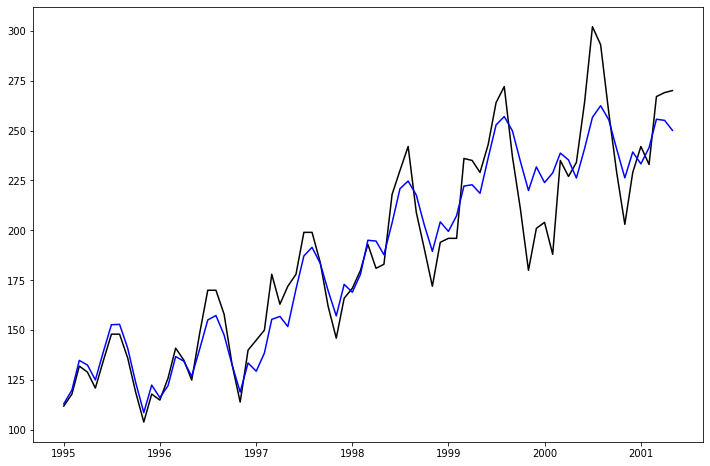

In [60]:
plt.figure(figsize=(12, 8))
plt.plot(train['Passengers'],  color="black")
plt.plot(hwm_model.fittedvalues,  color="blue")

In [61]:
forecast['hwm_forecast'] = hwm_model.forecast(len(test))

In [62]:
forecast

,Passengers,sma_forecast,cma_forecast,ses_forecast,ewm_forecast,hm_forecast,hwm_forecast
Month,,,,,,,
2001-06-01,315,0.000,315.000000,252.879249,315.000000,256.067943,268.036182
2001-07-01,364,0.000,339.500000,252.879249,319.900000,257.550221,283.017817
2001-08-01,347,0.000,342.000000,252.879249,322.610000,259.032499,284.999451
2001-09-01,312,0.000,334.500000,252.879249,321.549000,260.514777,274.981086
2001-10-01,274,0.000,322.400000,252.879249,316.794100,261.997055,259.962720
2001-11-01,237,0.000,308.166667,252.879249,308.814690,263.479333,246.944354
2001-12-01,278,0.000,303.857143,252.879249,305.733221,264.961611,262.925989
2002-01-01,284,301.375,301.375000,252.879249,303.559899,266.443889,258.907623
2002-02-01,277,296.625,298.666667,252.879249,300.903909,267.926167,266.889258


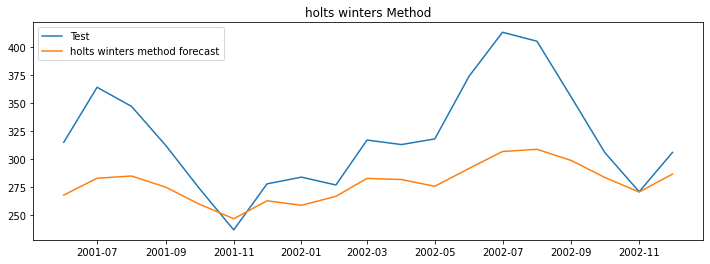

In [63]:
plt.figure(figsize=(12,4))
plt.plot(test['Passengers'], label='Test')
plt.plot(forecast['hwm_forecast'], label='holts winters method forecast')
plt.legend(loc='best')
plt.title('holts winters Method')
plt.show()

In [64]:
MAPE(forecast['hm_forecast'],test.Passengers) 

15.559925844524571

In [65]:
mse = mean_squared_error(forecast['hwm_forecast'],test.Passengers)
RMSE = np.sqrt(mse)
RMSE

51.53865572260045

# **We conclude that the exponential weighted moving average method in the smoothing techniques is able to forecast the sales closer to the actual values.The RMSE values for this method are lower as compared to other model methods. This method is very well able to capture the trend and seasonality in the data.**

# **Autoregressive models**

Dicky fuller test

In [66]:
from statsmodels.tsa.stattools import adfuller

In [67]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))

In [68]:
adf_test(data['Passengers'])

ADF Statistics: 1.3402479596467076
p- value: 0.9968250481137263


## data is not stationary , we can do differencing

In [69]:
data['Passengers First Difference']=data['Passengers']-data['Passengers'].shift(1)

In [70]:
data

,Passengers,Passengers First Difference
Month,,
1995-01-01,112,NaN
1995-02-01,118,6.0
1995-03-01,132,14.0
1995-04-01,129,-3.0
1995-05-01,121,-8.0
...,...,...
2002-08-01,405,-8.0
2002-09-01,355,-50.0
2002-10-01,306,-49.0


In [71]:
adf_test(data['Passengers First Difference'].dropna())

ADF Statistics: -2.150001735920646
p- value: 0.22488942647512866


p value greater than 0.05 , data is still not stationary , continuing to second differencing

In [72]:
data['Passengers Second Difference']=data['Passengers First Difference']-data['Passengers First Difference'].shift(1)

In [73]:
data

,Passengers,Passengers First Difference,Passengers Second Difference
Month,,,
1995-01-01,112,NaN,NaN
1995-02-01,118,6.0,NaN
1995-03-01,132,14.0,8.0
1995-04-01,129,-3.0,-17.0
1995-05-01,121,-8.0,-5.0
...,...,...,...
2002-08-01,405,-8.0,-47.0
2002-09-01,355,-50.0,-42.0
2002-10-01,306,-49.0,1.0


In [74]:
data = data.fillna(0)

In [75]:
data

,Passengers,Passengers First Difference,Passengers Second Difference
Month,,,
1995-01-01,112,0.0,0.0
1995-02-01,118,6.0,0.0
1995-03-01,132,14.0,8.0
1995-04-01,129,-3.0,-17.0
1995-05-01,121,-8.0,-5.0
...,...,...,...
2002-08-01,405,-8.0,-47.0
2002-09-01,355,-50.0,-42.0
2002-10-01,306,-49.0,1.0


In [76]:
adf_test(data['Passengers Second Difference'].dropna())

ADF Statistics: -11.774420925133905
p- value: 1.0708632591081517e-21


p value greater than 0.05 , data is now stationary

In [77]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

## PACF plot

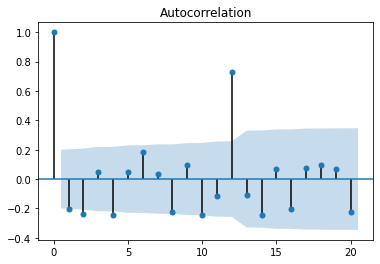

In [78]:
acf = plot_acf(data["Passengers Second Difference"].dropna())

## ACF plot

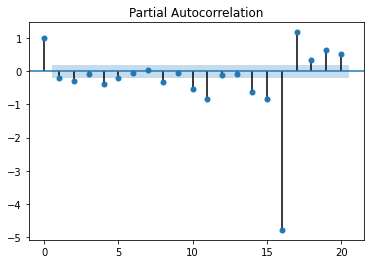

In [79]:
acf = plot_pacf(data["Passengers Second Difference"].dropna())

In [80]:
train_diff = data['Passengers Second Difference'].head(77)

In [81]:
train_diff

Month
1995-01-01     0.0
1995-02-01     0.0
1995-03-01     8.0
1995-04-01   -17.0
1995-05-01    -5.0
              ... 
2001-01-01   -13.0
2001-02-01   -22.0
2001-03-01    43.0
2001-04-01   -32.0
2001-05-01    -1.0
Name: Passengers Second Difference, Length: 77, dtype: float64

In [82]:
test_diff = data['Passengers Second Difference'].tail(19)

In [83]:
test_diff

Month
2001-06-01    44.0
2001-07-01     4.0
2001-08-01   -66.0
2001-09-01   -18.0
2001-10-01    -3.0
2001-11-01     1.0
2001-12-01    78.0
2002-01-01   -35.0
2002-02-01   -13.0
2002-03-01    47.0
2002-04-01   -44.0
2002-05-01     9.0
2002-06-01    51.0
2002-07-01   -17.0
2002-08-01   -47.0
2002-09-01   -42.0
2002-10-01     1.0
2002-11-01    14.0
2002-12-01    70.0
Name: Passengers Second Difference, dtype: float64

# **Auto regression method (AR)**

In [84]:
from statsmodels.tsa.arima_model import ARIMA

In [85]:
import warnings
warnings.filterwarnings("ignore")
model_ar = ARIMA(train_diff, order=(10, 0, 0)).fit()

In [86]:
model_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   ARMA Model Results                                   
========================================================================================
Dep. Variable:     Passengers Second Difference   No. Observations:                   77
Model:                              ARMA(10, 0)   Log Likelihood                -331.863
Method:                                 css-mle   S.D. of innovations             17.625
Date:                          Thu, 12 May 2022   AIC                            687.725
Time:                                  20:08:26   BIC                            715.851
Sample:                              01-01-1995   HQIC                           698.975
                                   - 05-01-2001                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -0.0043      0.345     -0.012      0.990      -0.681       0.672
ar.L1.Passengers Second Difference     -0.5996      0.105     -5.728      0.000      -0.805      -0.394
ar.L2.Passengers Second Difference     -0.7389      0.121     -6.092      0.000      -0.977      -0.501
ar.L3.Passengers Second Difference     -0.5217      0.137     -3.809      0.000      -0.790      -0.253
ar.L4.Passengers Second Difference     -0.7363      0.146     -5.027      0.000      -1.023      -0.449
ar.L5.Passengers Second Difference     -0.5021      0.160     -3.147      0.002      -0.815      -0.189
ar.L6.Passengers Second Difference     -0.5342      0.159     -3.370      0.001      -0.845      -0.224
ar.L7.Passengers Second Difference     -0.3358      0.149     -2.259      0.027      -0.627      -0.044
ar.L8.Passengers Second Difference     -0.5382      0.139     -3.886      0.000      -0.810      -0.267
ar.L9.Passengers Second Difference     -0.2804      0.128     -2.198      0.031      -0.530      -0.030
ar.L10.Passengers Second Difference    -0.3874      0.110     -3.529      0.001      -0.603      -0.172
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             0.9172           -0.5888j            1.0899           -0.0908
AR.2             0.9172           +0.5888j            1.0899            0.0908
AR.3             0.4822           -0.9618j            1.0759           -0.1760
AR.4             0.4822           +0.9618j            1.0759            0.1760
AR.5            -0.9837           -0.4231j            1.0708           -0.4354
AR.6            -0.9837           +0.4231j            1.0708            0.4354
AR.7            -0.6340           -0.8981j            1.0993           -0.3478
AR.8            -0.6340           +0.8981j            1.0993            0.3478
AR.9            -0.1435           -1.1551j            1.1639           -0.2697
AR.10           -0.1435           +1.1551j            1.1639            0.2697
------------------------------------------------------------------------------
"""

In [87]:
pred_start_date=test_diff.index[0]
pred_end_date=test_diff.index[-1]

In [88]:
forecast_reg = test.copy()

In [89]:
forecast_reg['AR_forecast'] = model_ar.predict(start = pred_start_date,end = pred_end_date)

In [90]:
forecast_reg

,Passengers,AR_forecast
Month,,
2001-06-01,315,18.455480
2001-07-01,364,-18.380814
2001-08-01,347,-14.691967
2001-09-01,312,4.824962
2001-10-01,274,2.437078
2001-11-01,237,6.219513
2001-12-01,278,16.139758
2002-01-01,284,-15.271514
2002-02-01,277,6.504661


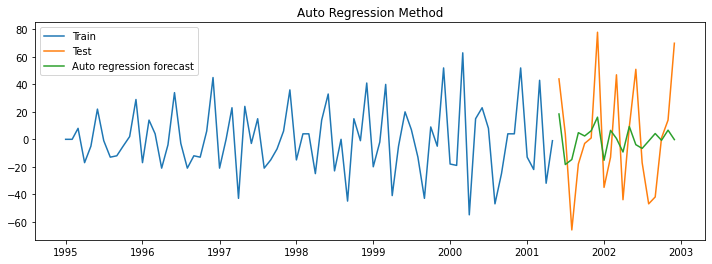

In [91]:
plt.figure(figsize=(12,4))
plt.plot(train_diff, label='Train')
plt.plot(test_diff, label='Test')
plt.plot(forecast_reg['AR_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

In [92]:
mse = mean_squared_error(forecast_reg['AR_forecast'],test_diff)
RMSE = np.sqrt(mse)
RMSE

36.02483484165334

# **Moving average method (MA)**

In [93]:
import warnings
warnings.filterwarnings("ignore")
model_ma = ARIMA(train_diff, order=(0, 0, 1)).fit()

In [94]:
model_ma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   ARMA Model Results                                   
========================================================================================
Dep. Variable:     Passengers Second Difference   No. Observations:                   77
Model:                               ARMA(0, 1)   Log Likelihood                -337.310
Method:                                 css-mle   S.D. of innovations             18.792
Date:                          Thu, 12 May 2022   AIC                            680.621
Time:                                  20:08:27   BIC                            687.652
Sample:                              01-01-1995   HQIC                           683.433
                                   - 05-01-2001                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -0.0010      0.095     -0.011      0.991      -0.186       0.184
ma.L1.Passengers Second Difference    -1.0000      0.033    -29.921      0.000      -1.066      -0.934
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [95]:
forecast_reg['MA_forecast'] = model_ma.predict(start = pred_start_date,end = pred_end_date)

In [96]:
forecast_reg

,Passengers,AR_forecast,MA_forecast
Month,,,
2001-06-01,315,18.455480,1.153327
2001-07-01,364,-18.380814,-0.001037
2001-08-01,347,-14.691967,-0.001037
2001-09-01,312,4.824962,-0.001037
2001-10-01,274,2.437078,-0.001037
2001-11-01,237,6.219513,-0.001037
2001-12-01,278,16.139758,-0.001037
2002-01-01,284,-15.271514,-0.001037
2002-02-01,277,6.504661,-0.001037


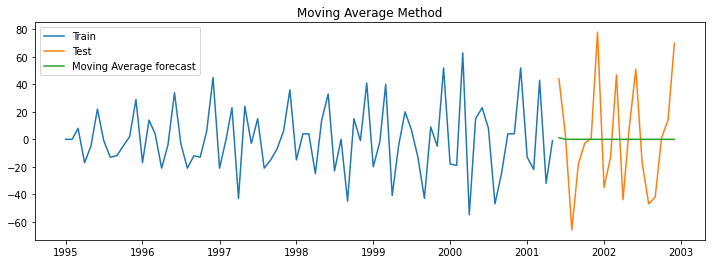

In [97]:
plt.figure(figsize=(12,4))
plt.plot(train_diff, label='Train')
plt.plot(test_diff, label='Test')
plt.plot(forecast_reg['MA_forecast'][test.index.min():], label='Moving Average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

In [98]:
mse = mean_squared_error(forecast_reg['MA_forecast'],test_diff)
RMSE = np.sqrt(mse)
RMSE

39.87204312259406

# **Auto regression moving average method (ARMA)**

In [99]:
import warnings
warnings.filterwarnings("ignore")
model_arma = ARIMA(train_diff, order=(10, 0, 1)).fit()

In [100]:
model_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   ARMA Model Results                                   
========================================================================================
Dep. Variable:     Passengers Second Difference   No. Observations:                   77
Model:                              ARMA(10, 1)   Log Likelihood                -321.059
Method:                                 css-mle   S.D. of innovations                nan
Date:                          Thu, 12 May 2022   AIC                            668.118
Time:                                  20:08:44   BIC                            698.587
Sample:                              01-01-1995   HQIC                           680.305
                                   - 05-01-2001                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   0.0264   1.46e-07   1.81e+05      0.000       0.026       0.026
ar.L1.Passengers Second Difference     -0.2078        nan        nan        nan         nan         nan
ar.L2.Passengers Second Difference     -0.5932        nan        nan        nan         nan         nan
ar.L3.Passengers Second Difference     -0.3224    4.2e-06  -7.67e+04      0.000      -0.322      -0.322
ar.L4.Passengers Second Difference     -0.6657   1.58e-06  -4.21e+05      0.000      -0.666      -0.666
ar.L5.Passengers Second Difference     -0.3248        nan        nan        nan         nan         nan
ar.L6.Passengers Second Difference     -0.5374   4.43e-06  -1.21e+05      0.000      -0.537      -0.537
ar.L7.Passengers Second Difference     -0.3754   4.41e-06  -8.52e+04      0.000      -0.375      -0.375
ar.L8.Passengers Second Difference     -0.6710   2.74e-06  -2.45e+05      0.000      -0.671      -0.671
ar.L9.Passengers Second Difference     -0.3248   3.89e-06  -8.35e+04      0.000      -0.325      -0.325
ar.L10.Passengers Second Difference    -0.6791   5.08e-06  -1.34e+05      0.000      -0.679      -0.679
ma.L1.Passengers Second Difference     -1.0000        nan        nan        nan         nan         nan
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             0.8662           -0.4996j            1.0000           -0.0833
AR.2             0.8662           +0.4996j            1.0000            0.0833
AR.3             0.4893           -0.8865j            1.0125           -0.1697
AR.4             0.4893           +0.8865j            1.0125            0.1697
AR.5            -0.9649           -0.4196j            1.0522           -0.4347
AR.6            -0.9649           +0.4196j            1.0522            0.4347
AR.7            -0.5892           -0.8604j            1.0428           -0.3456
AR.8            -0.5892           +0.8604j            1.0428            0.3456
AR.9            -0.0406           -1.0915j            1.0923           -0.2559
AR.10           -0.0406           +1.0915j            1.0923            0.2559
MA.1             1.0000           +0.0000j            1.0000            0.0000
------------------------------------------------------------------------------
"""

In [101]:
forecast_reg['ARMA_forecast'] = model_arma.predict(start = pred_start_date,end = pred_end_date)

In [102]:
forecast_reg

,Passengers,AR_forecast,MA_forecast,ARMA_forecast
Month,,,,
2001-06-01,315,18.455480,1.153327,37.330885
2001-07-01,364,-18.380814,-0.001037,-17.720291
2001-08-01,347,-14.691967,-0.001037,-32.853238
2001-09-01,312,4.824962,-0.001037,-9.217714
2001-10-01,274,2.437078,-0.001037,-12.538092
2001-11-01,237,6.219513,-0.001037,18.159631
2001-12-01,278,16.139758,-0.001037,37.172183
2002-01-01,284,-15.271514,-0.001037,-20.125161
2002-02-01,277,6.504661,-0.001037,9.088235


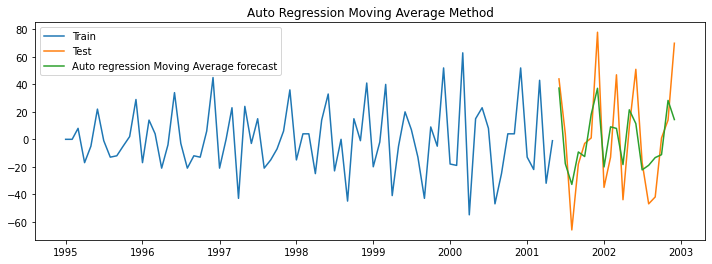

In [103]:
plt.figure(figsize=(12,4))
plt.plot(train_diff, label='Train')
plt.plot(test_diff, label='Test')
plt.plot(forecast_reg['ARMA_forecast'][test.index.min():], label='Auto regression Moving Average forecast')
plt.legend(loc='best')
plt.title('Auto Regression Moving Average Method')
plt.show()

In [104]:
mse = mean_squared_error(forecast_reg['ARMA_forecast'],test_diff)
RMSE = np.sqrt(mse)
RMSE

26.597473067557146

# **Auto regressive integrated moving average (ARIMA)**

In [105]:
import warnings
warnings.filterwarnings("ignore")
model_arima = ARIMA(train_diff, order=(10, 2, 1)).fit()

In [106]:
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    ARIMA Model Results                                    
===========================================================================================
Dep. Variable:     D2.Passengers Second Difference   No. Observations:                   75
Model:                             ARIMA(10, 2, 1)   Log Likelihood                -338.615
Method:                                    css-mle   S.D. of innovations             20.553
Date:                             Thu, 12 May 2022   AIC                            703.231
Time:                                     20:09:02   BIC                            733.358
Sample:                                 03-01-1995   HQIC                           715.260
                                      - 05-01-2001                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.0266      0.188      0.142      0.888      -0.342       0.395
ar.L1.D2.Passengers Second Difference     -1.9527      0.148    -13.156      0.000      -2.244      -1.662
ar.L2.D2.Passengers Second Difference     -2.6474      0.332     -7.981      0.000      -3.297      -1.997
ar.L3.D2.Passengers Second Difference     -2.9178      0.520     -5.609      0.000      -3.937      -1.898
ar.L4.D2.Passengers Second Difference     -2.7726      0.665     -4.171      0.000      -4.075      -1.470
ar.L5.D2.Passengers Second Difference     -2.2127      0.745     -2.970      0.004      -3.673      -0.753
ar.L6.D2.Passengers Second Difference     -1.4042      0.735     -1.911      0.061      -2.845       0.036
ar.L7.D2.Passengers Second Difference     -0.5106      0.640     -0.798      0.428      -1.765       0.744
ar.L8.D2.Passengers Second Difference      0.1322      0.477      0.277      0.783      -0.803       1.068
ar.L9.D2.Passengers Second Difference      0.5205      0.291      1.788      0.079      -0.050       1.091
ar.L10.D2.Passengers Second Difference     0.4441      0.116      3.833      0.000       0.217       0.671
ma.L1.D2.Passengers Second Difference      0.0918      0.136      0.674      0.503      -0.175       0.359
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.0850           -0.0000j            1.0850           -0.5000
AR.2            -0.9010           -0.4988j            1.0299           -0.4195
AR.3            -0.9010           +0.4988j            1.0299            0.4195
AR.4            -0.5066           -0.8862j            1.0208           -0.3326
AR.5            -0.5066           +0.8862j            1.0208            0.3326
AR.6             0.0143           -1.0415j            1.0416           -0.2478
AR.7             0.0143           +1.0415j            1.0416            0.2478
AR.8             0.5297           -0.8801j            1.0272           -0.1638
AR.9             0.5297           +0.8801j            1.0272            0.1638
AR.10            1.6400           -0.0000j            1.6400           -0.0000
MA.1           -10.8952           +0.0000j           10.8952            0.5000
------------------------------------------------------------------------------
"""

In [107]:
forecast_reg['ARIMA_forecast'] = model_arima.predict(start = pred_start_date,end = pred_end_date)

In [108]:
forecast_reg

,Passengers,AR_forecast,MA_forecast,ARMA_forecast,ARIMA_forecast
Month,,,,,
2001-06-01,315,18.455480,1.153327,37.330885,10.729893
2001-07-01,364,-18.380814,-0.001037,-17.720291,-53.620134
2001-08-01,347,-14.691967,-0.001037,-32.853238,-34.757199
2001-09-01,312,4.824962,-0.001037,-9.217714,59.444722
2001-10-01,274,2.437078,-0.001037,-12.538092,-2.826274
2001-11-01,237,6.219513,-0.001037,18.159631,-13.742405
2001-12-01,278,16.139758,-0.001037,37.172183,51.958082
2002-01-01,284,-15.271514,-0.001037,-20.125161,-100.542562
2002-02-01,277,6.504661,-0.001037,9.088235,46.157888


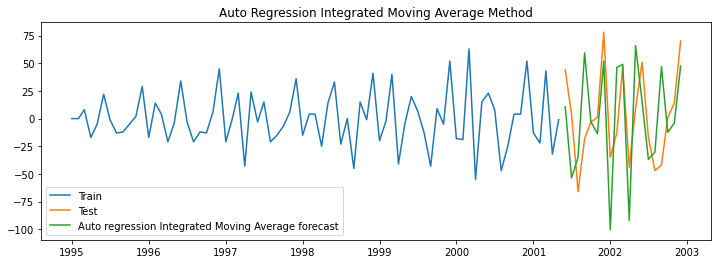

In [109]:
plt.figure(figsize=(12,4))
plt.plot(train_diff, label='Train')
plt.plot(test_diff, label='Test')
plt.plot(forecast_reg['ARIMA_forecast'][test.index.min():], label='Auto regression Integrated Moving Average forecast')
plt.legend(loc='best')
plt.title('Auto Regression Integrated Moving Average Method')
plt.show()

In [110]:
mse = mean_squared_error(forecast_reg['ARIMA_forecast'],test_diff)
RMSE = np.sqrt(mse)
RMSE

43.82419011196045

# **Seasonal auto regressive integrated moving average (SARIMA)**

In [111]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [112]:
import warnings
warnings.filterwarnings("ignore")
model_SARIMA=SARIMAX(train_diff,order=(10,2,10),seasonal_order=(1,2,1,12)).fit()

In [113]:
forecast_reg['SARIMAX_forecast'] = model_SARIMA.predict(start = pred_start_date,end = pred_end_date)

In [114]:
forecast_reg

,Passengers,AR_forecast,MA_forecast,ARMA_forecast,ARIMA_forecast,SARIMAX_forecast
Month,,,,,,
2001-06-01,315,18.455480,1.153327,37.330885,10.729893,38.400168
2001-07-01,364,-18.380814,-0.001037,-17.720291,-53.620134,-10.424510
2001-08-01,347,-14.691967,-0.001037,-32.853238,-34.757199,-17.295216
2001-09-01,312,4.824962,-0.001037,-9.217714,59.444722,-51.991146
2001-10-01,274,2.437078,-0.001037,-12.538092,-2.826274,19.624047
2001-11-01,237,6.219513,-0.001037,18.159631,-13.742405,-7.479652
2001-12-01,278,16.139758,-0.001037,37.172183,51.958082,61.585723
2002-01-01,284,-15.271514,-0.001037,-20.125161,-100.542562,-18.704024
2002-02-01,277,6.504661,-0.001037,9.088235,46.157888,-21.311803


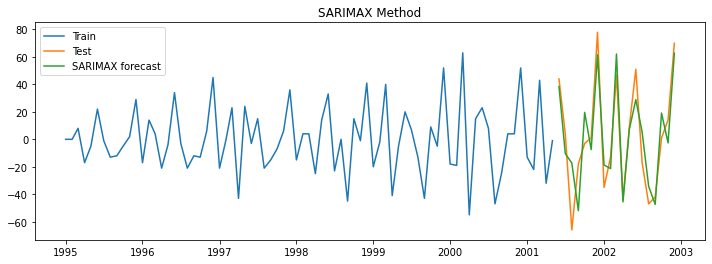

In [115]:
plt.figure(figsize=(12,4))
plt.plot(train_diff, label='Train')
plt.plot(test_diff, label='Test')
plt.plot(forecast_reg['SARIMAX_forecast'][test.index.min():], label='SARIMAX forecast')
plt.legend(loc='best')
plt.title('SARIMAX Method')
plt.show()

In [116]:
mse = mean_squared_error(forecast_reg['SARIMAX_forecast'],test_diff)
RMSE = np.sqrt(mse)
RMSE

19.215981448259694

# **Conclusion : Our inference from the flow chart and the actual models built for forecasting the sales of the time series data, show that:  
# **1 .exponential weighted moving average**
# **2.Seasonal auto regressive integrated moving average (SARIMA) technique.**

# are the best for forecasting the sales for the data.
# Both the methods have lower RMSE and MAPE values and are able to capture the trend and seasonality components well in the data